In [107]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px
from sklearn.datasets import load_iris
import datetime 
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D4/Mini Project/Palmer Penguins Dataset.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Data Loading and Cleaning:

Load the dataset using Pandas.
Perform basic data cleaning (handling missing values, incorrect data types, etc.).

In [108]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [109]:
df.duplicated().sum() # 0

np.int64(0)

In [110]:
#After seeing the na values, I decided to remove rows with two or more missing values. If a row has more than 2 missing values, do not include that row in the copy dataset.
df = df[df.isnull().sum(axis=1) <= 2].copy()


In [111]:
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [112]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [113]:
df.isna().sum() # to check if rows with 2 or more null values are no longer in the dataset.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [114]:
# p_male = df[df['sex'] == 'male']
# p_female = df[df['sex'] == 'female']

grouped = df.groupby(['island', 'sex'])['body_mass_g'].mean().reset_index()
grouped

,island,sex,body_mass_g
0,Biscoe,female,4319.375000
1,Biscoe,male,5104.518072
2,Dream,female,3446.311475
3,Dream,male,3987.096774
4,Torgersen,female,3395.833333
5,Torgersen,male,4034.782609


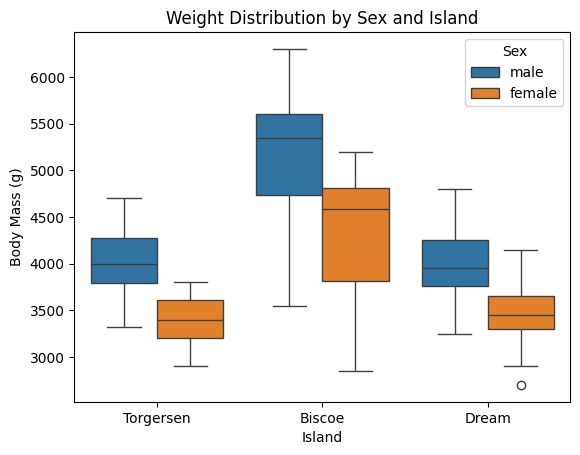

In [115]:
sns.boxplot(x='island', y='body_mass_g', hue='sex', data=df)
plt.title('Weight Distribution by Sex and Island')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.legend(title='Sex')
plt.show()

In [116]:
missing_sex_rows = df.loc[df['sex'].isna()]
missing_sex_rows

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [117]:
# Fill 'sex' for island Biscoe based on body_mass_g
df.loc[(df['island'] == 'Biscoe') & (df['body_mass_g'] >= 4500) & (df['sex'].isna()), 'sex'] = 'male'
df.loc[(df['island'] == 'Biscoe') & (df['body_mass_g'] < 4500) & (df['sex'].isna()), 'sex'] = 'female'

# Fill 'sex' for island Dream based on body_mass_g
df.loc[(df['island'] == 'Dream') & (df['body_mass_g'] >= 3500) & (df['sex'].isna()), 'sex'] = 'male'
df.loc[(df['island'] == 'Dream') & (df['body_mass_g'] < 3500) & (df['sex'].isna()), 'sex'] = 'female'

# Fill 'sex' for island Torgersen based on body_mass_g
df.loc[(df['island'] == 'Torgersen') & (df['body_mass_g'] >= 3500) & (df['sex'].isna()), 'sex'] = 'male'
df.loc[(df['island'] == 'Torgersen') & (df['body_mass_g'] < 3500) & (df['sex'].isna()), 'sex'] = 'female'

In [118]:
df.isna().sum() 

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [119]:
df.head(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,female,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,male,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,female,2007


Explanation of the above:

Step 1: first I loaded the data set and looked to see what if anything was missing, to see the size of the dataset, and what data types existed.

step 2: I saw that there were a small percentage of missing values, and when looking at the head and tail of the data, there were rows with multiple missing pieces of data. So I concluded that I did not need to fill these rows, instead I can drop the rows that had 2 or more missing values as the impact on the data set was already non-existent.

step 3: Any remaining values would be imputed using mean median etc. As we can see after removing rows with more than two NA's onle missing values are in male and female.

step4: to impute the NA's for sex, first I do a boxplot based on the islands to see the distribution of weight across male and female. I also create datasets for each islanf 1 for male and 1 for female so we can see the information shown by the box plot in a digestible form. Analyzing the chart and data we can see that there is a higher probability of male penguins being above 4500 grams and a higher probability of females being below 4500 grams for Biscoe island. Then for Dream and Torgsen,  there is a higher probability of male penguins being above 3500 grams and a higher probability of females being below 3500 grams. In order to confirm this we also create a dataset for the penguins who are missing the sex value and see what the distribution of their characteristics are for bady mass in grams. 

Step 5: Finally I use the thresholds to fill the NA for the sex column.

# Exploratory Data Analysis (EDA):

Use Pandas to summarize the key statistics of the dataset.

Identify unique values, ranges, and distribution of data.

In [120]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [121]:
df.groupby('island').agg({
    'bill_length_mm': 'mean',
    'flipper_length_mm': 'mean',
    'body_mass_g': 'mean'
})

,bill_length_mm,flipper_length_mm,body_mass_g
island,,,
Biscoe,45.257485,209.706587,4716.017964
Dream,44.167742,193.072581,3712.903226
Torgersen,38.950980,191.196078,3706.372549


# Visualization Tasks:

- Species Distribution: 
Use a bar chart to show the distribution of penguin species.

- Flipper Length vs. Body Mass: 
Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

- Island Distribution: 
Visualize the count of penguins on each island using a pie chart.

- Sex Distribution within Species: 
Create grouped bar charts showing the distribution of sex within each penguin species.

- Heatmap of Correlations: 
Plot a heatmap to visualize the correlations between numerical variables.

- Boxplots for Measurements: 
Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

- Histograms of Measurements:
 Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

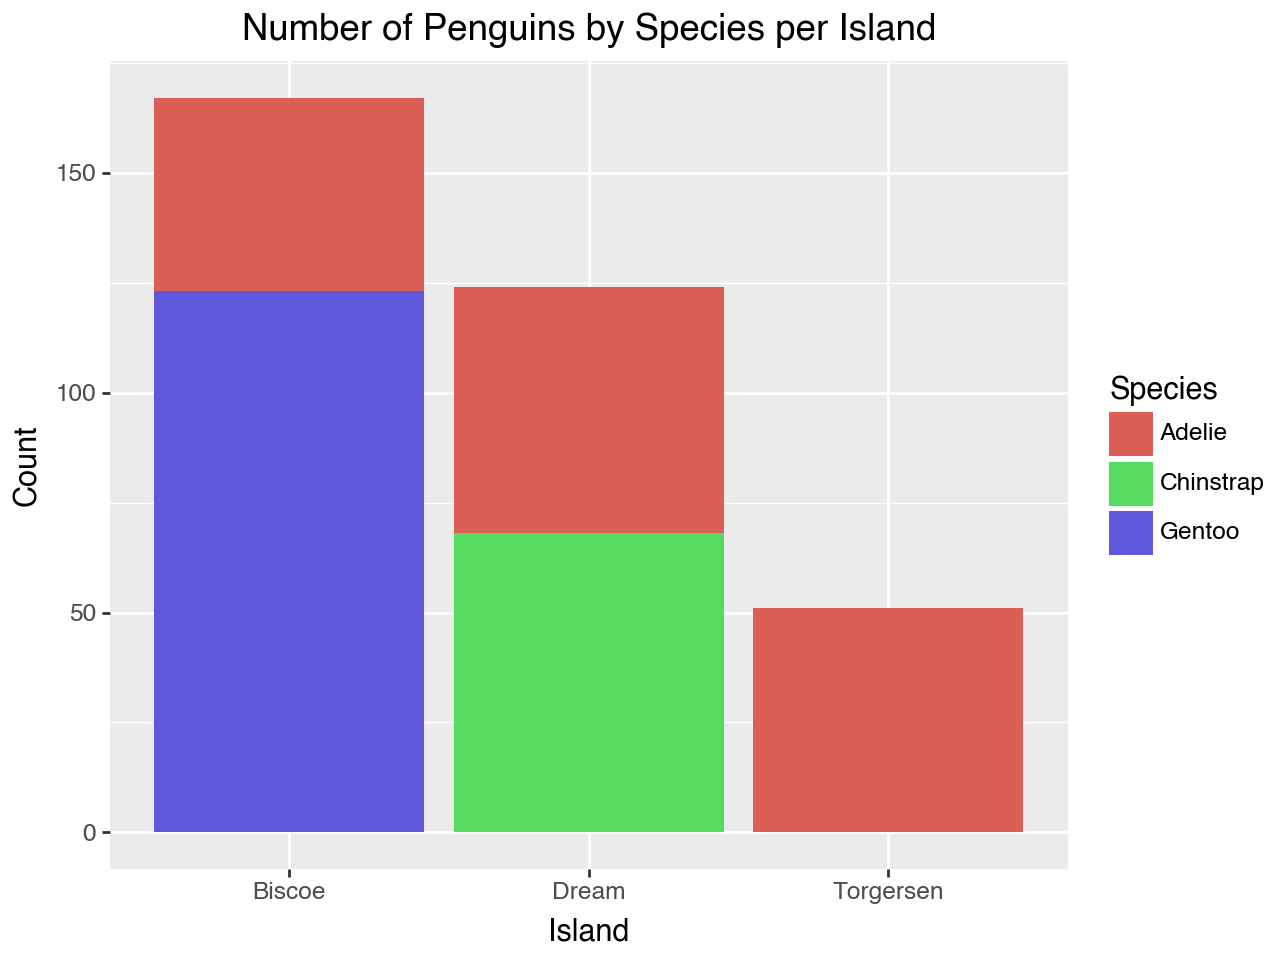

In [122]:
plot = (
    ggplot(df, aes(x='island', fill='species')) +
    geom_bar() +
    labs(
        title="Number of Penguins by Species per Island",
        x="Island",
        y="Count",
        fill="Species"
    )
)

plot.show()

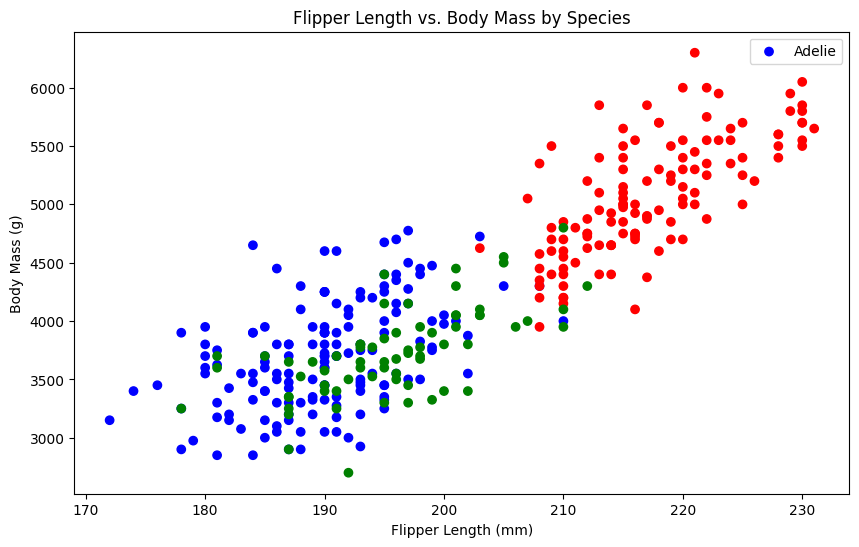

In [123]:
# Flipper Length vs. Body Mass: 
# Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species
plt.figure(figsize=(10, 6))
plt.scatter('flipper_length_mm', 'body_mass_g', data=df, c=df['species'].map({'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}))
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs. Body Mass by Species')
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'], loc='upper right')

plt.show()


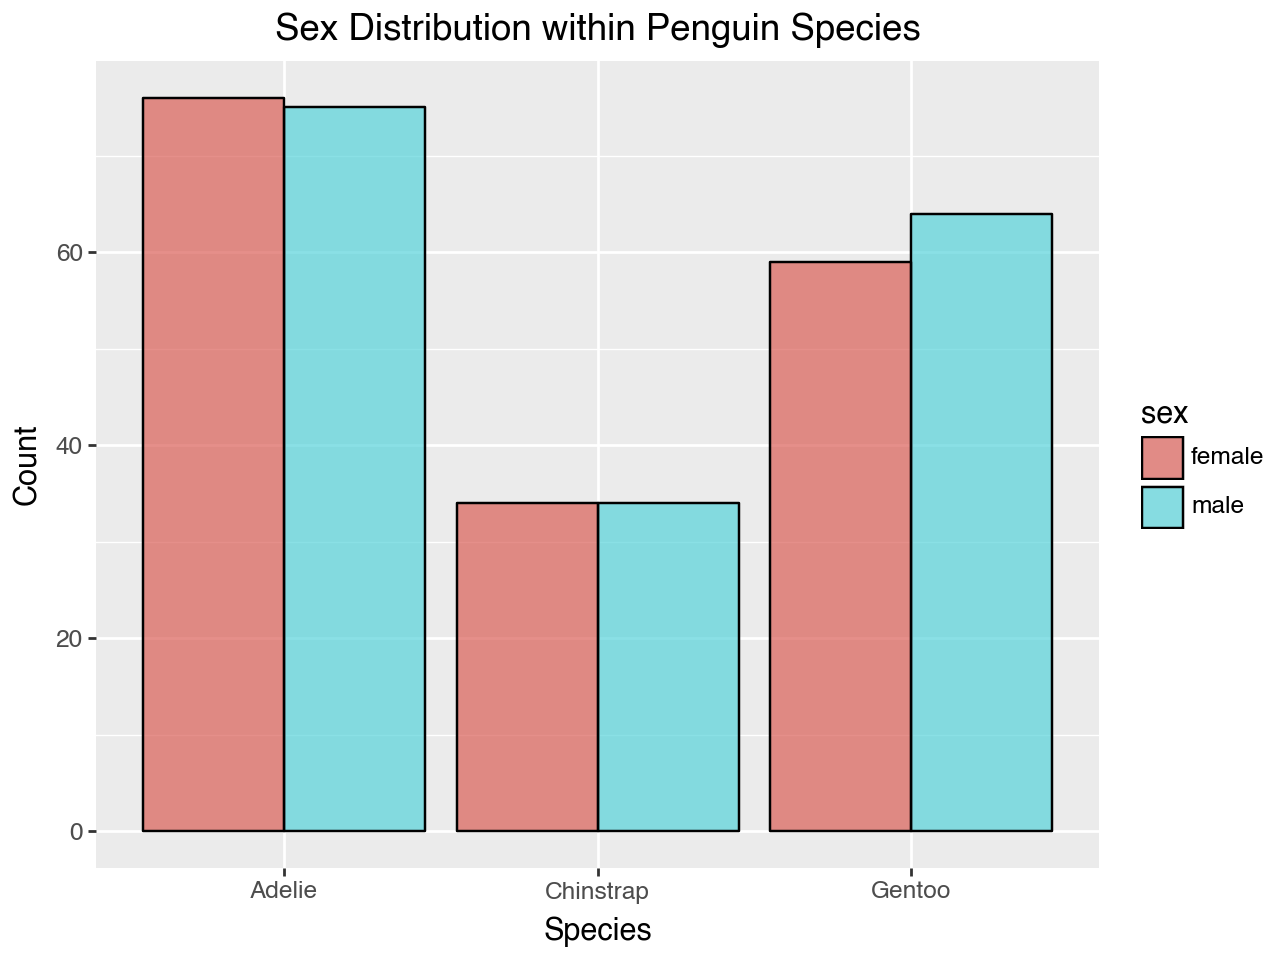

In [124]:

# Sex Distribution within Species: 
# Create grouped bar charts showing the distribution of sex within each penguin species.

sex_distribution = (
    ggplot(df, aes(x='species', fill='sex')) +
    geom_bar(position='dodge', color='black', alpha=0.7) +
    labs(
        title='Sex Distribution within Penguin Species',
        x='Species',
        y='Count'
    )
)
sex_distribution

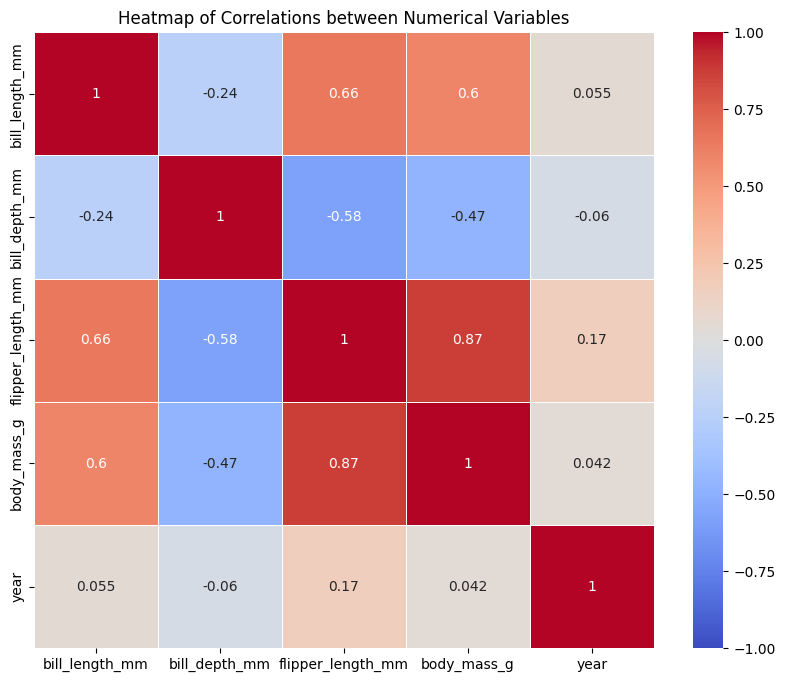

In [125]:

# Heatmap of Correlations: 
# Plot a heatmap to visualize the correlations between numerical variables.
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,          # Display correlation coefficients
    cmap='coolwarm',     # Color map
    linewidths=0.5,      # Lines between cells
    vmin=-1, vmax=1,     # Ensure consistent color scale
    cbar=True            # Include color bar
)
plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()

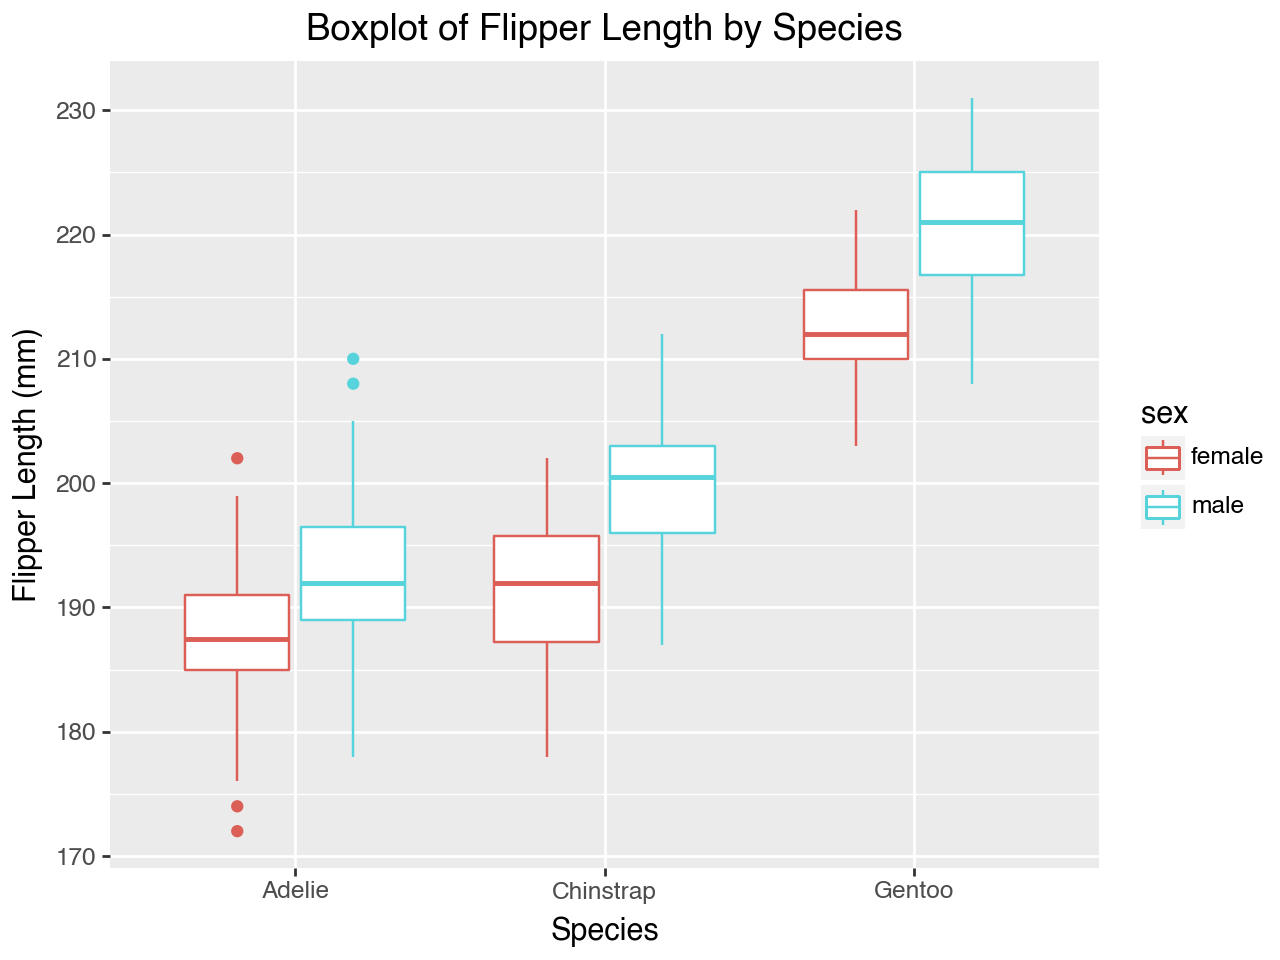

In [126]:
# Boxplots for Measurements: 
# Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

boxplot_flipper_length = (
    ggplot(df, aes(x='species', y='flipper_length_mm', color='sex')) +
    geom_boxplot() +
    labs(
        title='Boxplot of Flipper Length by Species',
        x='Species',
        y='Flipper Length (mm)'
    )
)
boxplot_flipper_length

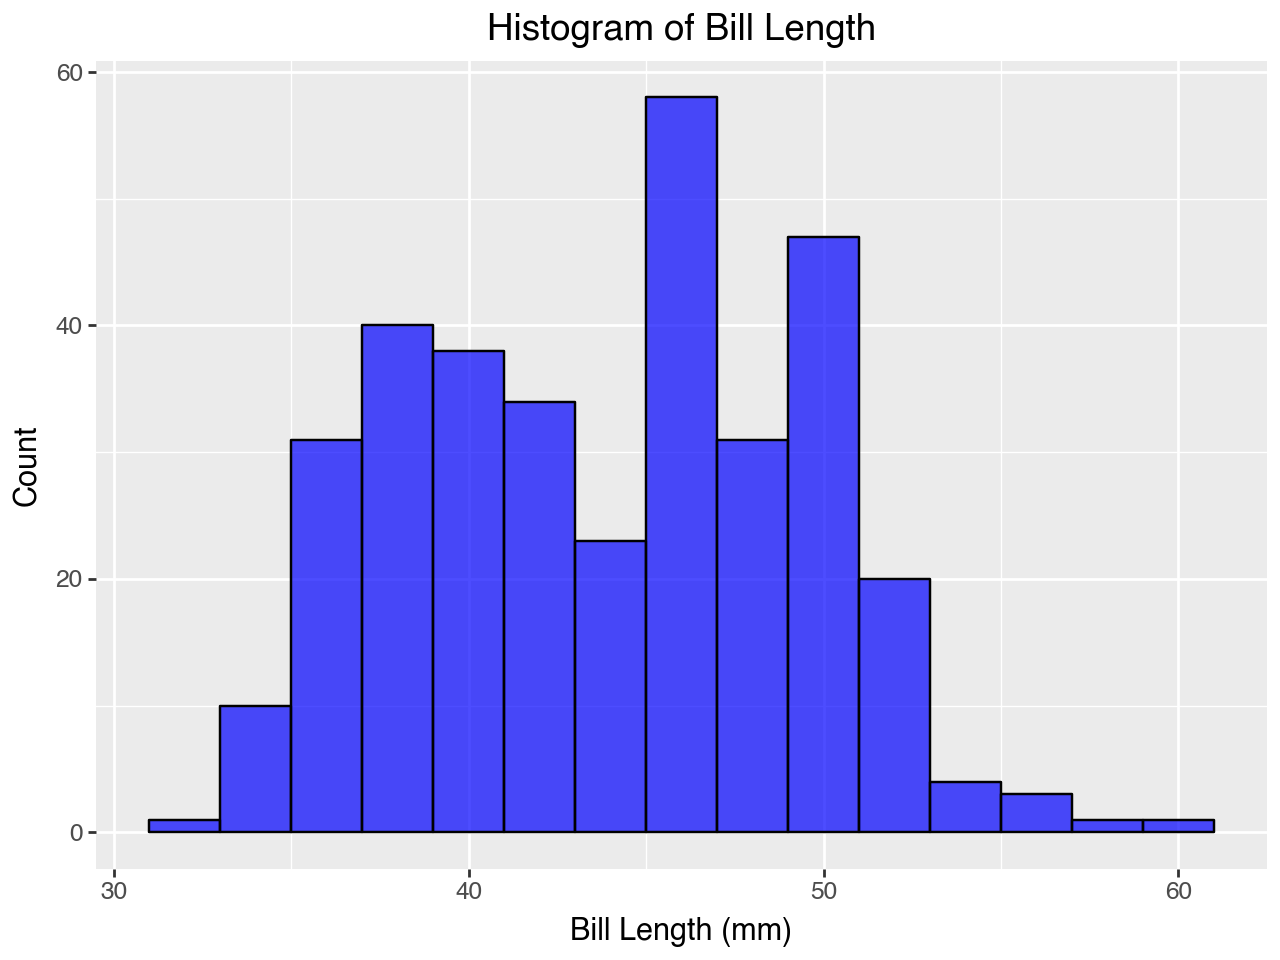

In [127]:
# Histograms of Measurements:
# Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

histogram_bill_length = (
    ggplot(df, aes(x='bill_length_mm')) +
    geom_histogram(binwidth=2, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Bill Length',
        x='Bill Length (mm)',
        y='Count'
    )
)
histogram_bill_length

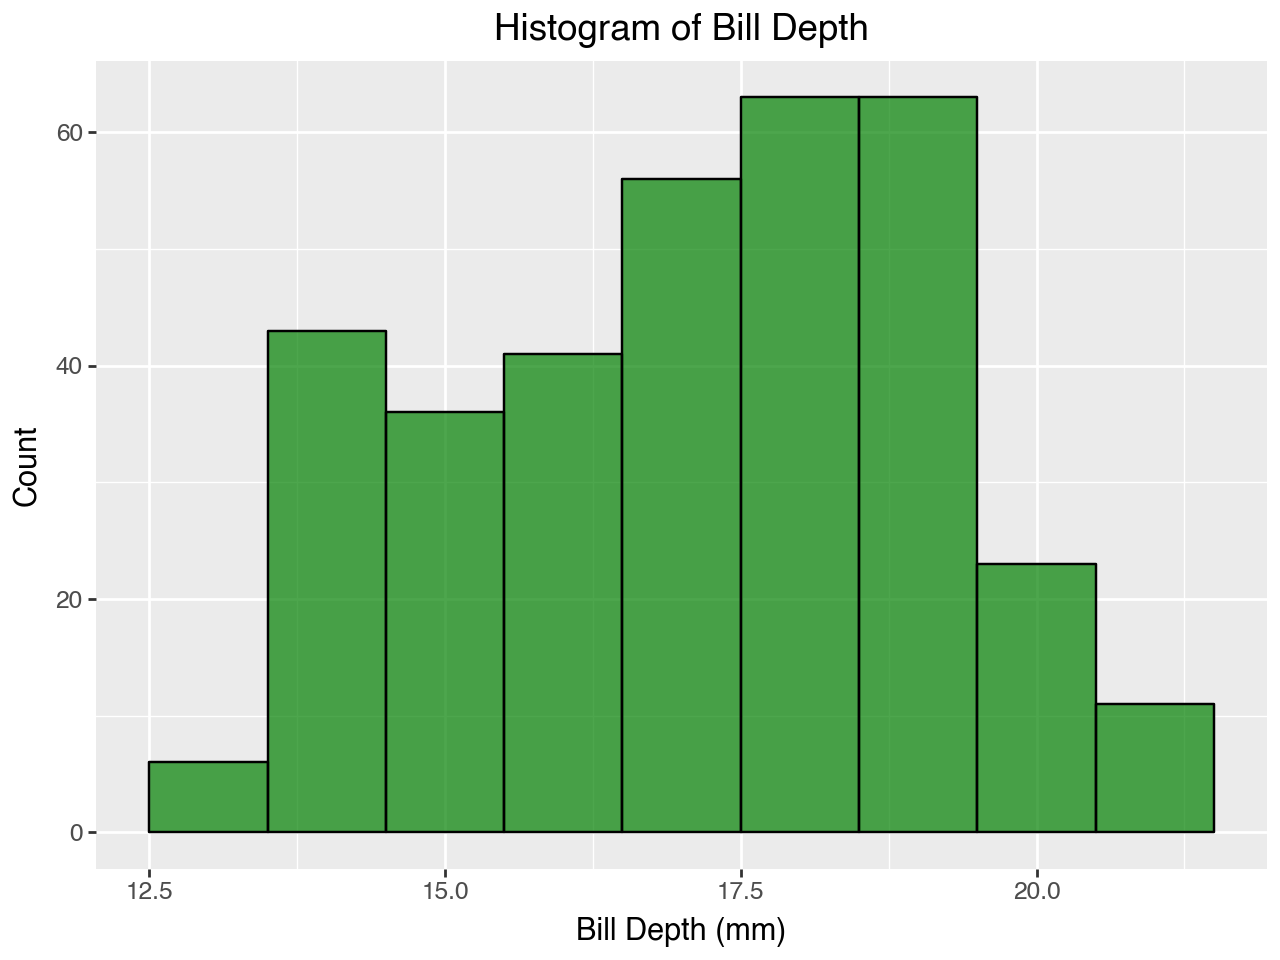

In [ ]:
# Histograms of Measurements:
# Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

histogram_bill_depth = (
    ggplot(df, aes(x='bill_depth_mm')) +
    geom_histogram(binwidth=1, fill='green', color='black', alpha=0.7) +
    labs(
        title='Histogram of Bill Depth',
        x='Bill Depth (mm)',
        y='Count'
    )
)
histogram_bill_depth

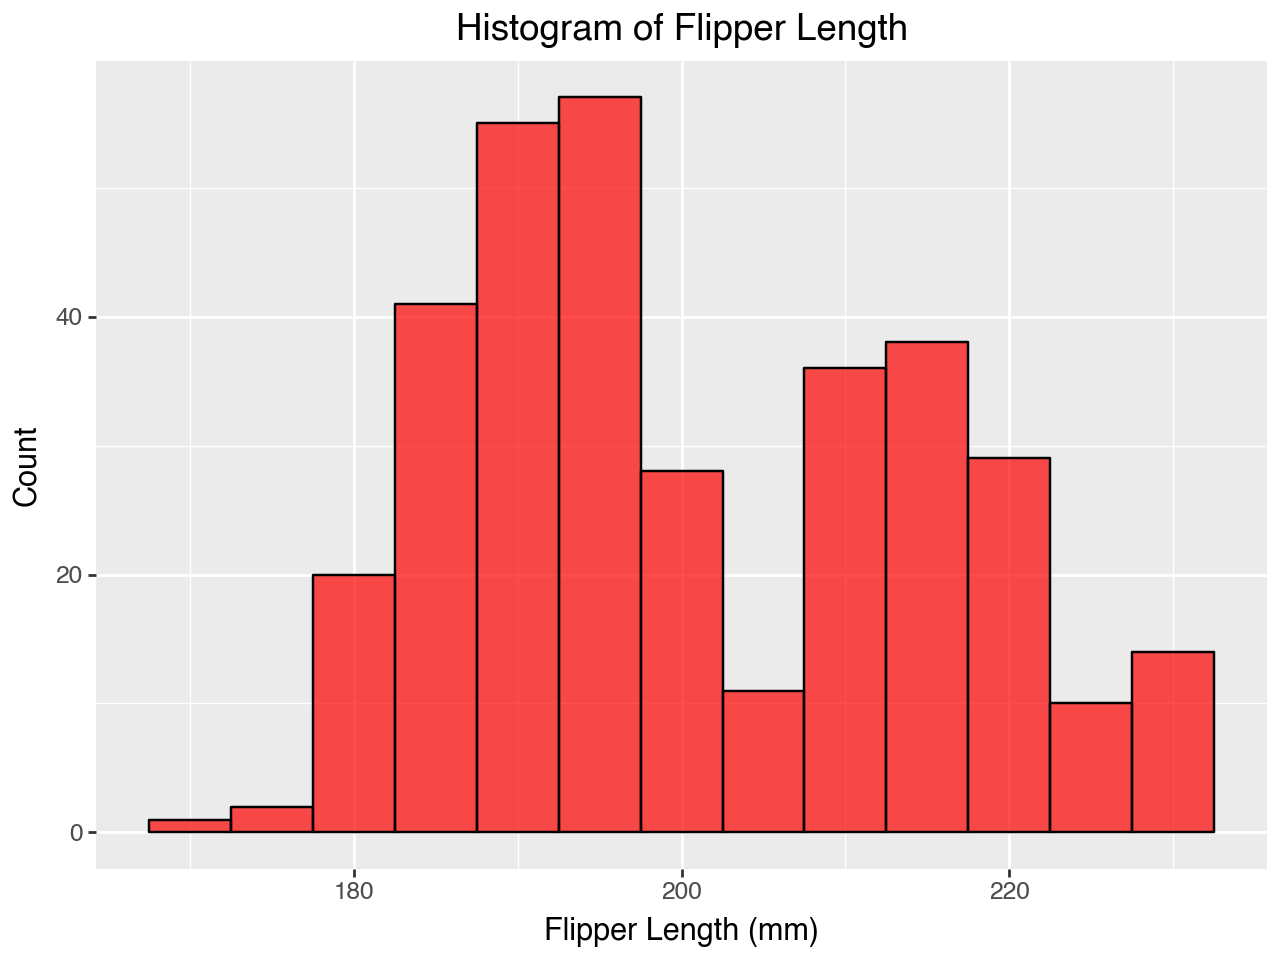

In [129]:
# Histograms of Measurements:
# Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

histogram_flipper_length = (
    ggplot(df, aes(x='flipper_length_mm')) +
    geom_histogram(binwidth=5, fill='red', color='black', alpha=0.7) +
    labs(
        title='Histogram of Flipper Length',
        x='Flipper Length (mm)',
        y='Count'
    )
)
histogram_flipper_length

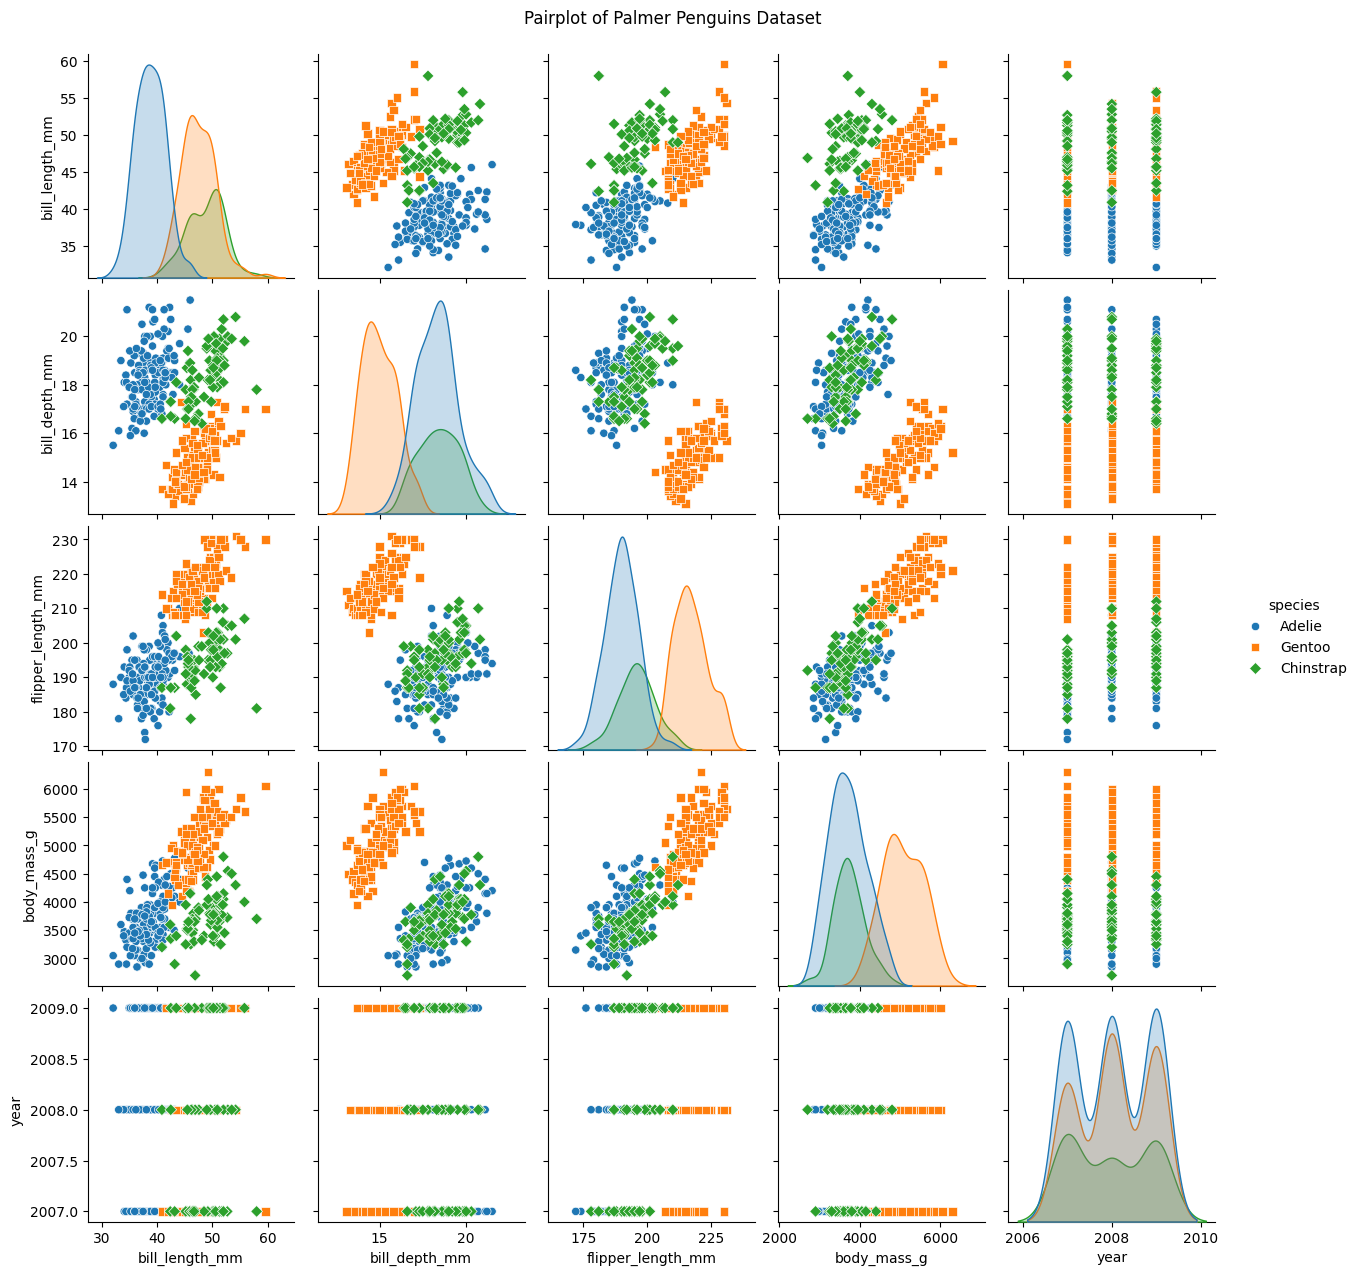

In [130]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Palmer Penguins Dataset', y=1.02)
plt.show()

Insights: 

Christnap Penguins have the most average qualities of all the species in terms of bill length, depth, flipper length and body mass.Other than that, all penguins share small veriations in their appearance and stature. That being said the smallest penguins by weight are Christnap and the largest are Adelie.